In [18]:
# define object names we want to load in
envname='/home/mia/OneDrive/simsrg/verif_env_stim3e-16.0et6.0ph1.0p0.5t0.1pl0.5bp0.0.pkl'
aname='/home/mia/OneDrive/simsrg/verif_a_stim3e-16.0et6.0ph1.0p0.5t0.1pl0.5bp0.0.pkl'

In [19]:
# import stuff
from placerg.funcs import *
from placerg.objects import *
from placerg.funcsrg import *
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [20]:
# set up notebook display
np.set_printoptions(threshold=5)
alpha=0.4
color='black'
cmap='Greys'
colorline='black'
linethick=3.
colorfit='grey'
plt.style.use('seaborn-paper')
palit=['black', 'firebrick', 'orangered','darkorange', \
       'goldenrod',  'gold']
fontsize=18
ticksize=14
alpha=.3
colorfit='gray'
linecolor='black'

In [21]:
# load in objects
env=load_object(envname)
a=load_object(aname)
afake=infoset(env.N, env.pmatfake, a.k)

In [22]:
"""
this is a verification of the RG process. 
Done using the following process:
1) Generate the fake data set 'afake.clusterlist':
    make a new empty activity array to hold your fake data
    select the first row of the activity matrix 
    (matrix of dimension (number of cells, number of time steps)).
    Make 2 copies of this row
    Then choose 2 random spins in each copy to flip and flip them. 
    Save these 2 altered copies in a new activity matrix.
    Continue repeating this procedure on each of the 2 rows in the new activity matrix
    You will get 4 rows. 
    Continue repeating until new activity array is filled
2) Perform RG on the fake activity array
3) Because of the fake data set's branching structure, we should have the 0th spin most
   correlated with the 1st spin, 2nd spin most correlated with 3rd spin...
   Thus if we take the indices for each cluster, order them, the change between entries in
   the ordered array of each cluster must be 1
   If this is not true, then a flag is raised.
"""

flag='GOOD!'
arr=afake.clusterlist
for i in range(afake.k):
    test=arr[i]
    shape=test.shape
    test=np.sort(test,axis=1)
    check=(test[:,1:shape[1]]-test[:,:(shape[1]-1)])
    if np.array(np.where(check != 1.)).size != 0:
        flag = 'BAD!!!'
    print(flag)

GOOD!
GOOD!
GOOD!
GOOD!
GOOD!
GOOD!
GOOD!
GOOD!


Text(0.5, 1.0, 'average cross correlation of average activity and place field')

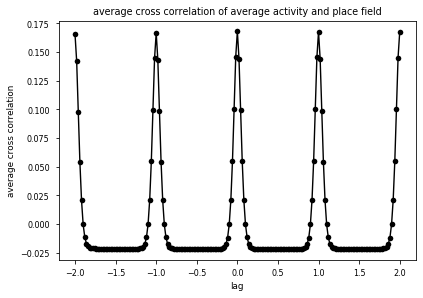

In [23]:
"""
plot the average cross correlation of average place cell activity and place field.
we should observe peaks at lags of integer loop index
"""

def placecorrplot(cell, env):
    bins=100
    x,y = env.corrplace(cell, bins=bins)
    return x,y
rs=[]
for cell in range(env.placecell.size):
    x,y=placecorrplot(cell, env)
    rs.append(y)

y=np.mean(np.vstack(rs), axis=0)
interval = 100
plt.plot(x[int(x.size/2-interval):\
           int(x.size/2+interval+1)]/env.xmax, \
         y[int(x.size/2-interval):int(x.size/2+interval+1)], '-o', color=colorline)

plt.xlabel('lag')
plt.ylabel('average cross correlation')
plt.title('average cross correlation of average activity and place field')

correlation time calculated:0.08516944702034708
correlation time assigned:0.1
standard deviation calculated:1.0396424301716065
standard deviation assigned:1.0
mean (should be 0):0.049204783221239466


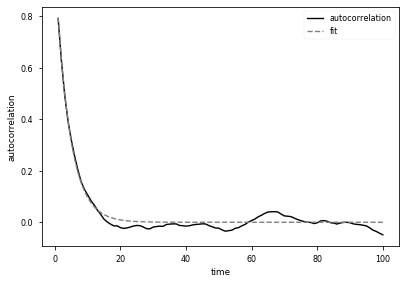

In [24]:
"""
Here check that I am calculating the stochastic process correctly.
Fit the autocorrelation of stochastic process 0 to exponential decay and extract its
time constant.
"""
fieldindex=0
result=env.process[:,fieldindex]
    # of the form stim( time constant, standard deviation, time step, length of process))
corre=autocorr(result.flatten())
x=corre[0][int(corre[1].size/2+1):][:100]
y=corre[1][int(corre[1].size/2+1):][:100]

plt.plot(x, y, label='autocorrelation', color=colorline)
popt, pcov = curve_fit(expfunc, x, y)
plt.plot(x, expfunc(x, popt[0], popt[1]), '--', color=colorfit, label='fit')

print('correlation time calculated:'+str((1/popt[0])/env.xmax))
print('correlation time assigned:'+str(env.taus[fieldindex]/env.xmax))
print('standard deviation calculated:'+str(np.std(result))) # standard deviation
print('standard deviation assigned:'+str(env.sigmas[fieldindex]))
print('mean (should be 0):'+str(np.mean(result)) )

plt.xlabel('time')
plt.ylabel('autocorrelation')
plt.legend()

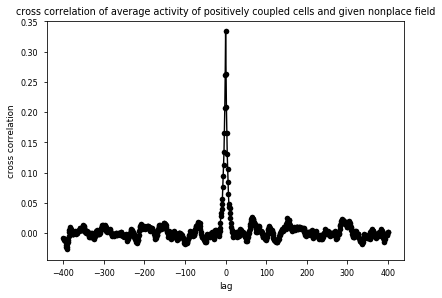

In [25]:
"""
plot cross correlation of average activity of nonplace cells exclusively coupled to a 
given nonplace field
"""
interval=400
i=0
bins=1000
resbin=[]
resbiny=[]
while i<env.nstim:
    if env.corrnonplace(i, att='positive')=='None!':
        i += 1
    else:
        x,y = env.corrnonplace(i, bins=bins, att='positive')
        resbin.append(x)
        resbiny.append(y)
    break
if np.array(resbin).size !=0:
    resbin=np.mean(np.vstack(resbin), axis=0)
    resbiny=np.mean(np.vstack(resbiny), axis=0)
    plt.plot(resbin[int(resbin.size/2-interval):int(resbin.size/2+interval+1)], \
                 resbiny[int(resbin.size/2-interval):int(resbin.size/2+interval+1)], \
                '-o', color=colorline)
    plt.xlabel('lag')
    plt.ylabel('cross correlation')
    plt.title('cross correlation of average activity of positively coupled cells and given nonplace field')

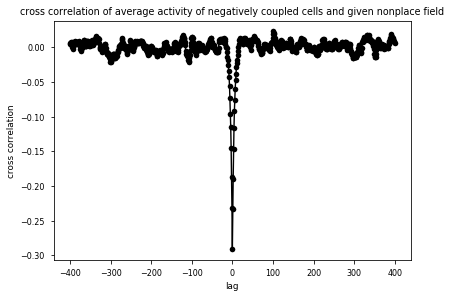

In [26]:
"""
plot cross correlation of average activity of nonplace cells exclusively coupled to a 
given nonplace field
"""
interval=400
i=0
bins=1000
resbin=[]
resbiny=[]
while i<env.nstim:
    if env.corrnonplace(i, att='negative')=='None!':
        i += 1
    else:
        x,y = env.corrnonplace(i, bins=bins, att='negative')
        resbin.append(x)
        resbiny.append(y)
    break

if np.array(resbin).size !=0:
    resbin=np.mean(np.vstack(resbin), axis=0)
    resbiny=np.mean(np.vstack(resbiny), axis=0)
    plt.plot(resbin[int(resbin.size/2-interval):int(resbin.size/2+interval+1)], \
                 resbiny[int(resbin.size/2-interval):int(resbin.size/2+interval+1)], \
                '-o', color=colorline)
    plt.xlabel('lag')
    plt.ylabel('cross correlation')
    plt.title('cross correlation of average activity of negatively coupled cells and given nonplace field')